In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:

import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train[0]

array([-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
        0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
       -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
        3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
       -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
        1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014])

In [ ]:
X_test[0]

array([-0.46649743, -0.13728933, -0.44421138, -0.48646498,  0.28085007,
        0.04160589, -0.11146496, -0.26486866,  0.41524141,  0.13513744,
       -0.02091509, -0.29323907, -0.17460869, -0.2072995 , -0.01181432,
       -0.35108921, -0.1810535 , -0.24238831, -0.33731758, -0.0842133 ,
       -0.2632354 , -0.14784208, -0.33154752, -0.35109337,  0.48001942,
       -0.09649594, -0.03583041, -0.19435087,  0.17275669,  0.20372995])

In [ ]:


# Define the activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialize weights and bias
weights = np.random.randn(30)
bias = 3

# Set the learning rate
learning_rate = 0.01

# Train the model
for epoch in range(100):
  for i in range(len(X_train)):
    # Calculate the output
    output = sigmoid(np.dot(X_train[i], weights) + bias)

    # Calculate the error
    #error = targeted value - predicted value
    error = y_train[i] - output

    # Update the weights and bias
    weights += learning_rate * error * X_train[i]
    bias += learning_rate * error


In [ ]:

# Make predictions on the test data
y_pred = sigmoid(np.dot(X_test, weights) + bias)
y_pred = np.round(y_pred)
y_pred


array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

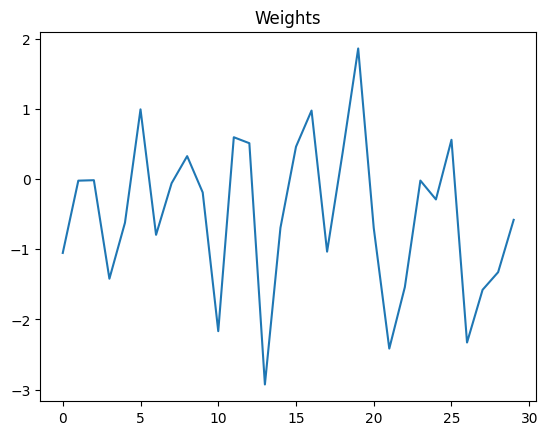

In [ ]:


import matplotlib.pyplot as plt

# Plot the weights
plt.plot(weights)
plt.title("Weights")
plt.show()



In [ ]:

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912280701754386


In [ ]:


# Define the activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialize weights and bias
weights = np.random.randn(30)
bias = 0

# Set the learning rate
learning_rate = 0.001

# Train the model
for epoch in range(100):
  for i in range(len(X_train)):
    # Calculate the output
    output = sigmoid(np.dot(X_train[i], weights) + bias)

    # Calculate the error
    error = y_train[i] - output

    # Update the weights and bias
    weights += learning_rate * error * X_train[i]
    bias += learning_rate * error


In [ ]:

# Make predictions on the test data
y_pred = sigmoid(np.dot(X_test, weights) + bias)
y_pred = np.round(y_pred)



In [ ]:

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544
